# LLM 원리 + OpenAI Chat Completion API 활용

---

## 학습 목표

1. **LLM 기본 개념**: 트랜스포머 아키텍처와 토큰 예측 원리 이해
2. **OpenAI API 기초**: Chat Completion API의 기본 사용법 습득
3. **멀티모달 활용**: 텍스트, 이미지, 오디오를 처리하는 방법 학습
4. **구조화된 출력**: JSON Schema를 사용한 구조화된 응답 생성
5. **매개변수 최적화**: Temperature, Top-p 등 주요 매개변수 활용
6. **다양한 API**: Embeddings, Moderation, Function Calling, Streaming 활용

---

## 1. LLM 기본 개념

### 1.1 LLM(Large Language Model)의 생성 원리

**LLM은 어떻게 작동하나요?**
- **트랜스포머 구조**: 대화형 AI의 핵심 아키텍처
- **토큰 예측**: 다음에 올 가장 적절한 단어를 예측
- **학습 방식**: 인터넷의 방대한 텍스트 데이터로 사전 훈련

**핵심 프로세스**
1. **토큰화**: 텍스트를 작은 단위(토큰)로 분할
2. **확률 계산**: 각 토큰이 다음에 올 확률 계산
3. **토큰 생성**: 확률 분포에 따라 토큰 선택
4. **반복**: 종료 조건까지 과정 반복


**트랜스포머**:
- **인코더-디코더 구조**: 입력과 출력을 동시에 처리
- **어텐션 메커니즘**: 입력의 모든 부분을 동시에 고려하여 중요한 정보에 집중


<div style="text-align: left; font-size: 12px;">
<div style="text-align: center;">
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/34/Transformer%2C_full_architecture.png/440px-Transformer%2C_full_architecture.png"
        alt="Illustrations for the Transformer and attention mechanism showing the full Transformer architecture"
        width="600"
        style="border: 0;">
</div>

**Image Title:** Transformer Architecture Illustration  
**Source:** [GitHub - DL Visuals](https://github.com/dvgodoy/dl-visuals/?tab=readme-ov-file)  
**License:** [Creative Commons Attribution 4.0 International License](https://creativecommons.org/licenses/by/4.0/)  
**Author(s):** dvgodoy  

</div>

---

## 2. OpenAI API 핵심 개념

### 1.1 주요 구성 요소

**1. 메시지 형식**

  ```python
  messages = [
      {"role": "system", "content": "당신은 도움이 되는 AI 어시스턴트입니다."},
      {"role": "user", "content": "파이썬에서 리스트를 정렬하는 방법을 알려주세요."},
      {"role": "assistant", "content": "sort() 메서드나 sorted() 함수를 사용할 수 있습니다."}
  ]
  ```

**2. 현재 사용 가능한 주요 모델 (2025년 기준)**

  - **gpt-4.1**: 최고 성능, 복잡한 작업용
  - **gpt-4.1-mini**: 빠른 속도, 비용 효율적
  - **gpt-4.1-nano**: 초고속, 최저 비용
  - **o3, o4-mini**: 복잡한 추론 작업용
  - **gpt-4o**: 멀티모달 (텍스트, 이미지, 오디오)

  > ** 참고**: 모델 목록은 지속적으로 업데이트됩니다. 최신 모델 정보는 [OpenAI Platform - Models](https://platform.openai.com/docs/models)에서 확인하세요.

**3. API 응답 구조**

  ```json
  {
    "id": "chatcmpl-...",
    "object": "chat.completion",
    "model": "gpt-4.1-mini",
    "choices": [
      {
        "message": {
          "role": "assistant", 
          "content": "생성된 텍스트"
        }
      }
    ],
    "usage": {
      "prompt_tokens": 10,
      "completion_tokens": 50,
      "total_tokens": 60
    }
  }
  ```


---

## 3. 환경 설정


- **uv 프로젝트 설정**
    - **프로젝트 생성**: `uv init [프로젝트명]`
    - **가상환경 생성**: `uv venv --python=3.12`
    - **가상환경 활성화**: `.venv/bin/activate` (Unix) 또는 `.venv\Scripts\activate` (Windows) # 굳이 하지 않아도 된다.


- **패키지 설치**

    ```bash
    # uv 사용 (권장)
    uv add langchain langchain_openai python-dotenv ipykernel

    # pip 사용
    pip install langchain langchain_openai python-dotenv ipykernel
    ```

- **API 키 설정**

    ```python
    # .env 파일 생성 - 환경변수는 무조건 대문자로 작성해야한다.
    OPENAI_API_KEY=your_api_key_here

    # Python에서 로드
    from dotenv import load_dotenv
    import os

    load_dotenv()
    OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")
    ```


In [ ]:
from dotenv import load_dotenv
load_dotenv()  # .env 파일에서 환경 변수 로드
# root에 .env가 없으면 경로를 load_dotenv() 이곳에 넣어줘야한다.

True

In [ ]:
# .env에 "OPENAI_API_KEY"키로 환경변수 설정한 API 키 값이 나온다.
# import os
# os.getenv("OPENAI_API_KEY")


---

## 4. 기본 사용법

### 4.1 텍스트 답변을 생성

* OpenAI 클라이언트 설정
  - `from openai import OpenAI`로 OpenAI 패키지를 임포트합니다
  - `client = OpenAI()`로 API 클라이언트를 생성합니다
  - API 키는 환경변수나 직접 설정을 통해 제공할 수 있습니다
  - 보안을 위해 API 키는 `.env` 파일이나 환경변수를 통해 관리하는 것이 권장됩니다

* Chat Completion 요청 구조
  - `client.chat.completions.create()`를 통해 텍스트 생성을 요청합니다
  - `model`: 사용할 모델을 지정 (예: "gpt-4.1-mini")
  - `messages`: 대화 맥락을 리스트 형태로 전달
    - `role`: "system", "user" 등의 역할 지정
    - `content`: 실제 메시지 내용
  - `temperature`: 생성 텍스트의 무작위성 조절 (0~1)
  - `max_tokens`: 생성될 최대 토큰 수 제한

* 응답 처리
  - API는 JSON 형태로 응답을 반환합니다
  - `response.choices[0].message.content`: 생성된 분석 텍스트
  - `response.usage`: 토큰 사용량 정보
  - `response.id`: 응답의 고유 식별자
  - `response.model`: 사용된 모델 정보


In [4]:
# OpenAI API를 직접 사용하는 방법 (에러 처리 포함)
from openai import OpenAI
from openai import OpenAIError, APIError, RateLimitError, APIConnectionError
import os

# 통신을 위한 클라이언트 생성 (.env 파일을 사용하지 않는 경우에는 주석을 해제하고 api_key를 직접 입력)
client = OpenAI(
    api_key = os.getenv("OPENAI_API_KEY"),
)

try:
    # Completion 요청 (prompt -> completion)
    response = client.chat.completions.create(
        model="gpt-4.1-mini-2025-04-14",
        messages=[
            # system 역할 - 전반적인 동작 방식 정의 (GPT-4 계열에서 권장)
            {"role": "system", "content": "You are a helpful programming assistant."},
            # user 역할 - 실제 요청 내용
            # 시점에 대한 질문의 경우 정확한 시간을 입력해야한다. - 오늘 X
            {"role": "user", "content": "오늘 날짜는 언제인가요?"},
        ],
        temperature=0.7,
        max_tokens=2000,
    )
    
    # 결과 출력
    print(response)
    print("="*100)
    print("id:", response.id)
    print("-"*100)
    print('model:', response.model)
    print("-"*100)
    print("text:", response.choices[0].message.content)
    print("-"*100)
    print("usage:", response.usage)

except RateLimitError as e:
    print(f"⚠️ Rate Limit 오류: API 사용량 한도를 초과했습니다. 잠시 후 다시 시도해주세요.")
    print(f"상세 정보: {e}")
except APIConnectionError as e:
    print(f"⚠️ 연결 오류: OpenAI API 서버에 연결할 수 없습니다. 네트워크 연결을 확인해주세요.")
    print(f"상세 정보: {e}")
except APIError as e:
    print(f"⚠️ API 오류: OpenAI API에서 오류가 발생했습니다.")
    print(f"상세 정보: {e}")
except OpenAIError as e:
    print(f"⚠️ OpenAI 오류: {e}")
except Exception as e:
    print(f"⚠️ 예상치 못한 오류가 발생했습니다: {e}")

ChatCompletion(id='chatcmpl-D5VGXHqmd79kucCKF44ty06V5Yizw', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='오늘 날짜는 2024년 6월 15일입니다. 도움이 필요하시면 언제든지 말씀해 주세요!', refusal=None, role='assistant', annotations=[], audio=None, function_call=None, tool_calls=None))], created=1770204197, model='gpt-4.1-mini-2025-04-14', object='chat.completion', service_tier='default', system_fingerprint='fp_e01c6f58e1', usage=CompletionUsage(completion_tokens=26, prompt_tokens=25, total_tokens=51, completion_tokens_details=CompletionTokensDetails(accepted_prediction_tokens=0, audio_tokens=0, reasoning_tokens=0, rejected_prediction_tokens=0), prompt_tokens_details=PromptTokensDetails(audio_tokens=0, cached_tokens=0)))
id: chatcmpl-D5VGXHqmd79kucCKF44ty06V5Yizw
----------------------------------------------------------------------------------------------------
model: gpt-4.1-mini-2025-04-14
------------------------------------------------------------------------

In [5]:
# 결과 출력 (Markdown)
from IPython.display import Markdown, display

display(Markdown(response.choices[0].message.content))

오늘 날짜는 2024년 6월 15일입니다. 도움이 필요하시면 언제든지 말씀해 주세요!

---

### 4.2 구조화된 JSON 출력

구조화된 출력은 데이터 처리와 분석에 용이하며, API 응답의 일관성을 보장합니다.

* JSON Schema 정의
  - `response_format`을 통해 응답의 형식을 JSON으로 지정합니다
  - `json_schema`에서 데이터 구조와 각 필드의 특성을 정의합니다
    - `type`: 데이터 타입 (string, number 등)
    - `description`: 각 필드에 대한 설명
    - `required`: 필수 필드 지정
    - `additionalProperties`: 추가 속성 허용 여부

* 정보 추출 과정
  - 입력된 텍스트에서 정규화된 형태로 정보를 추출
  - 지정된 스키마에 맞춰 JSON 객체 구성
  - 필수 필드가 누락되지 않도록 검증
  - 가격과 같은 숫자 정보는 적절한 형식으로 변환

In [1]:
from openai import OpenAI
client = OpenAI()

response = client.chat.completions.create(
    model="gpt-4.1-mini-2025-04-14",
    messages=[
        {
            "role": "system",
            "content": "상품 정보를 구조화된 형태로 추출하고, 각 속성에 대해 자세히 설명합니다."
        },
        {
            "role": "user",
            "content": "애플 아이폰 15 프로 256GB (블랙) - 1,500,000원"
        }
    ],
    response_format={
        "type": "json_schema",
        "json_schema": {
            "name": "product_schema",
            "description": "상품의 상세 정보를 구조화하기 위한 스키마",
            "schema": {
                "type": "object",
                "properties": {
                    "brand": {
                        "type": "string",
                        "description": "제조사 또는 브랜드 이름 (예: 애플, 삼성, LG 등)"
                    },
                    "model": {
                        "type": "string",
                        "description": "제품의 모델명 또는 시리즈명"
                    },
                    "capacity": {
                        "type": "string",
                        "description": "저장 용량 또는 규격 (예: 256GB, 512GB 등)"
                    },
                    "color": {
                        "type": "string",
                        "description": "제품의 색상"
                    },
                    "price": {
                        "type": "number",
                        "description": "제품의 가격 (단위: 원)",
                        "minimum": 0
                    },
                    "category": {
                        "type": "string",
                        "description": "제품의 카테고리 (예: 스마트폰, 노트북 등)"
                    },
                },
                "required": ["brand", "model", "price"],
                "additionalProperties": False
            }
        }
    }
)

# 결과 출력
print(response)
print("="*100)
print("id:", response.id)
print("-"*100)
print('model:', response.model)
print("-"*100)
print("text:", response.choices[0].message.content)
print("-"*100)
print("usage:", response.usage)

ChatCompletion(id='chatcmpl-D6Tf5xaXtLRULhZnwhBQcfL4YCslH', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='{"brand":"애플","model":"아이폰 15 프로","capacity":"256GB","color":"블랙","price":1500000,"category":"스마트폰"}', refusal=None, role='assistant', annotations=[], audio=None, function_call=None, tool_calls=None))], created=1770436359, model='gpt-4.1-mini-2025-04-14', object='chat.completion', service_tier='default', system_fingerprint='fp_75546bd1a7', usage=CompletionUsage(completion_tokens=36, prompt_tokens=404, total_tokens=440, completion_tokens_details=CompletionTokensDetails(accepted_prediction_tokens=0, audio_tokens=0, reasoning_tokens=0, rejected_prediction_tokens=0), prompt_tokens_details=PromptTokensDetails(audio_tokens=0, cached_tokens=0)))
id: chatcmpl-D6Tf5xaXtLRULhZnwhBQcfL4YCslH
----------------------------------------------------------------------------------------------------
model: gpt-4.1-mini-2025-04-14
-----------------

In [2]:
import json

data = json.loads(response.choices[0].message.content)
data

{'brand': '애플',
 'model': '아이폰 15 프로',
 'capacity': '256GB',
 'color': '블랙',
 'price': 1500000,
 'category': '스마트폰'}

---

### 4.3 이미지 분석 (멀티모달)

OpenAI API를 사용한 이미지 분석(멀티모달 기능을 통해 이미지에 대한 상세 분석과 설명을 자연어로 얻을 수 있습니다.


* 이미지 입력 방식
  - URL 방식
    - 웹상의 이미지 URL을 직접 전달
    - `image_url` 파라미터를 통해 이미지 URL 지정
    - 인터넷 접근이 가능한 이미지에 대해 사용
  
  - Base64 인코딩 방식
    - 로컬 이미지 파일을 Base64 문자열로 변환
    - `encode_image()` 함수로 이미지 파일을 Base64로 인코딩
    - 인코딩된 문자열을 `data:image/jpeg;base64,` 형식으로 전달
    - 로컬 이미지나 비공개 이미지 처리에 적합

* API 요청 구조
  - `messages` 배열에 멀티모달 컨텐츠 포함
    - `type`: "text" 또는 "image_url"로 컨텐츠 유형 구분
    - 텍스트와 이미지를 함께 전달 가능
    - `role`을 통해 개발자/사용자 역할 지정


`(1) 이미지 URL 사용`

> **필요 파일**: Base64 예제에서 사용하는 `data/celltrion_report_chart.jpg` 파일이 필요합니다.

- uv add pillow

In [3]:
# 이미지 출력
from IPython.display import Image, display

# 예시 이미지 URL
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/600px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg"

# 노트북에 이미지 출력
display(Image(url=image_url))

이미지 크기: (600, 391)
이미지 모드: RGB
이미지 포맷: JPEG


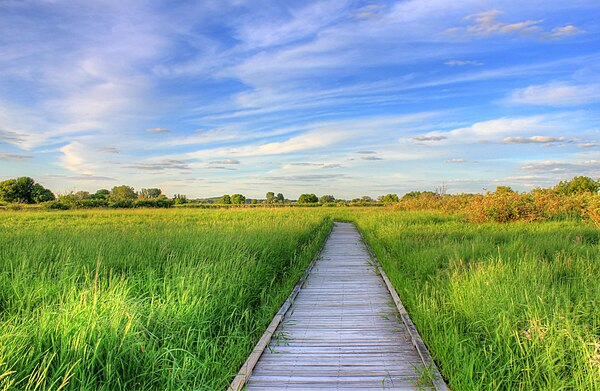

이미지 다운로드 및 표시 완료!


In [4]:
import httpx
import asyncio
from PIL import Image
from io import BytesIO

async def download_and_display_image(image_url):
    """이미지를 비동기로 다운로드하고 표시하는 함수"""
    
    async with httpx.AsyncClient(headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}) as client:
        # 비동기로 이미지 다운로드
        response = await client.get(image_url)
        
        # 응답 상태 확인
        response.raise_for_status()
        
        # 이미지 열기
        img = Image.open(BytesIO(response.content))
        
        # 이미지 정보 출력
        print(f"이미지 크기: {img.size}")
        print(f"이미지 모드: {img.mode}")
        print(f"이미지 포맷: {img.format}")
        
        # 이미지 출력
        display(img)
        
        return img


try:
    img = await download_and_display_image(image_url)
    print("이미지 다운로드 및 표시 완료!")
except httpx.HTTPError as e:
    print(f"HTTP 에러 발생: {e}")
except Exception as e:
    print(f"일반 에러 발생: {e}")

In [5]:
from openai import OpenAI

client = OpenAI()

response = client.chat.completions.create(
    model="gpt-4.1-mini",
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "What's in this image? Answer in 한국어."},
                {
                    "type": "image_url",
                    "image_url": {
                        "url": image_url,
                    }
                },
            ],
        }
    ],
)

# 결과 출력
print(response)
print("="*100)
print("id:", response.id)
print("-"*100)
print('model:', response.model)
print("-"*100)
print("text:", response.choices[0].message.content)
print("-"*100)
print("usage:", response.usage)

ChatCompletion(id='chatcmpl-D5rSGOFdihyBckgQUytFISp1K9ERf', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='이 이미지는 푸른 하늘과 구름이 있는 넓은 초원 풍경을 보여줍니다. 가운데에는 나무로 된 길이 쭉 뻗어 있으며, 그 양옆으로는 키 큰 초록색 풀과 식물들이 자라고 있습니다. 평화롭고 자연적인 분위기를 느낄 수 있는 장면입니다.', refusal=None, role='assistant', annotations=[], audio=None, function_call=None, tool_calls=None))], created=1770289492, model='gpt-4.1-mini-2025-04-14', object='chat.completion', service_tier='default', system_fingerprint='fp_e01c6f58e1', usage=CompletionUsage(completion_tokens=80, prompt_tokens=419, total_tokens=499, completion_tokens_details=CompletionTokensDetails(accepted_prediction_tokens=0, audio_tokens=0, reasoning_tokens=0, rejected_prediction_tokens=0), prompt_tokens_details=PromptTokensDetails(audio_tokens=0, cached_tokens=0)))
id: chatcmpl-D5rSGOFdihyBckgQUytFISp1K9ERf
----------------------------------------------------------------------------------------------------
model: gpt-4.1-mini-20

`(2)  Base 64 encoded format 사용`

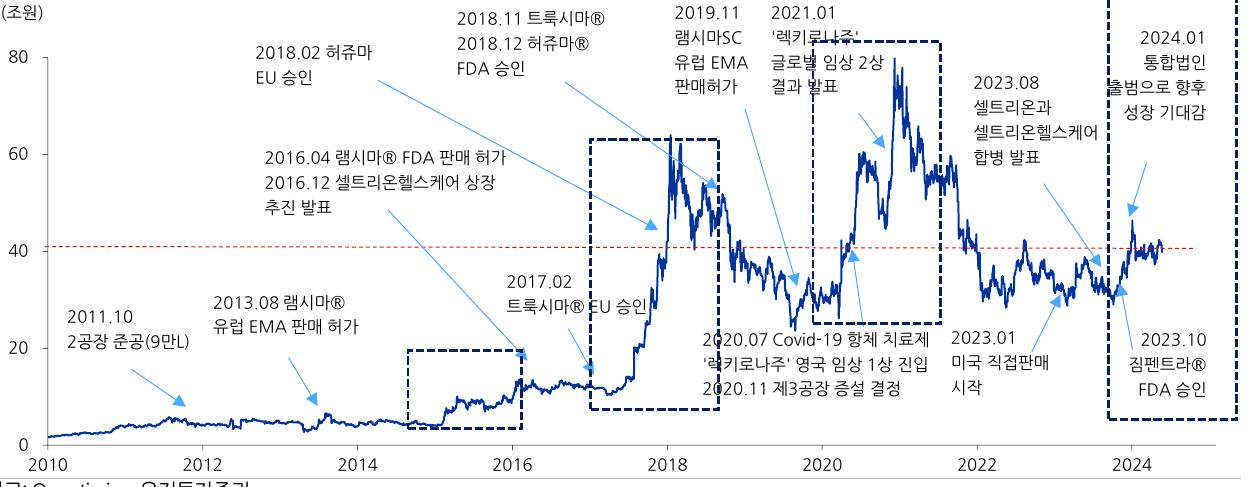

In [6]:
# 로컬 이미지 파일 경로
image_path = "data/celltrion_report_chart.jpg"

# 이미지 출력
img = Image.open(image_path)
display(img)

In [7]:
import base64

def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

# 이미지를 base64 포맷 문자열로 변환
base64_image = encode_image(image_path)

base64_image

'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHnBOMDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD3SXUIYtTt9PAZ7iZGkwo4RFxlm9BkgDuSfQHGfc+K9OtLmS3kg1cvGxVjFo93IpI9GWIgj3BIqvpB83xr4kkk5kjW1gTPaMIXH/jzv+VZXiKDWL63jg1rUW02xvbhbOO30ht0hLkgGSZwPl9VVR6ZIoA6jRtasNf08X+mzNL

In [8]:
import base64
from openai import OpenAI

client = OpenAI()

# 이전 셀에서 정의한 encode_image 함수 재사용
# 이미지를 base64 포맷 문자열로 변환
base64_image = encode_image(image_path)

response = client.chat.completions.create(
    model="gpt-4.1-mini",
    messages=[
        {
            "role": "system",
            "content": [
                {
                    "type": "text",
                    "text": """You are a financial chart analyst. For any chart:
                            1. Identify the financial metrics being displayed
                            2. Note key price levels, support/resistance areas
                            3. Identify significant trends and pattern formations
                            4. Calculate relevant indicators (if visible)
                            5. Highlight trading volume patterns
                            6. Point out any significant market events
                            7. Provide technical analysis insights
                            Be specific with price levels and dates. Answer in 한국어."""
                }
            ]
        },
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "What does this chart show?"
                },
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/jpeg;base64,{base64_image}"
                    }
                }
            ]
        }
    ]
)

print(response.choices[0])

Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='이 차트는 2010년부터 2024년까지 특정 기업 또는 산업의 매출액(조원 단위)을 시간에 따라 보여주는 그래프입니다. \n\n주요 특징 및 분석 내용은 다음과 같습니다:\n\n1. **재무 지표**: 세로축은 매출액(단위: 조원)을 나타내며, 가로축은 2010년부터 2024년까지 연도별 시간 흐름을 보여줍니다.\n\n2. **주요 가격 수준 및 변화**:\n   - 2010년대 초반에는 10조원 이하로 비교적 낮은 매출 유지\n   - 2016년경부터 매출이 점차 증가하여 2018년 후반 최대 약 70조원에 도달\n   - 2019년~2020년 사이 급격한 변동 후 다시 40조원 근처로 안정화\n   - 2023년 이후 약 40조원 대에서 등락을 반복하며 2024년까지 유지 중\n\n3. **중요한 이벤트 주석**:\n   - 2011년 10월 2공장 준공 (9만)\n   - 2013년 8월 램시마® 유럽 EMA 판매 허가\n   - 2016년 FDA 판매 허가, 상장 추진 발표 (셀트리온헬스케어)\n   - 2017년 EU 승인 및 2018년 FDA 승인 (트룩시마®)\n   - 2019년 램시마SC 유럽 EMA 판매허가\n   - 2020년 코로나19 항체 치료제 임상 진입, 공장 증설 결정\n   - 2021년 렉키로나주 임상 2상 결과 발표\n   - 2023년 셀트리온과 셀트리온헬스케어 합병 발표 및 미국 직접판매 시작\n   - 2023년 10월 짐펜트라® FDA 승인\n   - 2024년 1월 통합법인 출범 예정으로 향후 성장 기대감 반영\n\n4. **트렌드 및 패턴**:\n   - 전반적으로 큰 폭의 상승과 하락이 교차되는 사이클을 보임\n   - 2016년부터 2018년까지 급격한 성장이 주목됨 (특히 허가 승인 이벤트와 맞물림)\n   - 2020년 코로나19 치료제 관련 임상

In [9]:
print(response.choices[0].message.content)

이 차트는 2010년부터 2024년까지 특정 기업 또는 산업의 매출액(조원 단위)을 시간에 따라 보여주는 그래프입니다. 

주요 특징 및 분석 내용은 다음과 같습니다:

1. **재무 지표**: 세로축은 매출액(단위: 조원)을 나타내며, 가로축은 2010년부터 2024년까지 연도별 시간 흐름을 보여줍니다.

2. **주요 가격 수준 및 변화**:
   - 2010년대 초반에는 10조원 이하로 비교적 낮은 매출 유지
   - 2016년경부터 매출이 점차 증가하여 2018년 후반 최대 약 70조원에 도달
   - 2019년~2020년 사이 급격한 변동 후 다시 40조원 근처로 안정화
   - 2023년 이후 약 40조원 대에서 등락을 반복하며 2024년까지 유지 중

3. **중요한 이벤트 주석**:
   - 2011년 10월 2공장 준공 (9만)
   - 2013년 8월 램시마® 유럽 EMA 판매 허가
   - 2016년 FDA 판매 허가, 상장 추진 발표 (셀트리온헬스케어)
   - 2017년 EU 승인 및 2018년 FDA 승인 (트룩시마®)
   - 2019년 램시마SC 유럽 EMA 판매허가
   - 2020년 코로나19 항체 치료제 임상 진입, 공장 증설 결정
   - 2021년 렉키로나주 임상 2상 결과 발표
   - 2023년 셀트리온과 셀트리온헬스케어 합병 발표 및 미국 직접판매 시작
   - 2023년 10월 짐펜트라® FDA 승인
   - 2024년 1월 통합법인 출범 예정으로 향후 성장 기대감 반영

4. **트렌드 및 패턴**:
   - 전반적으로 큰 폭의 상승과 하락이 교차되는 사이클을 보임
   - 2016년부터 2018년까지 급격한 성장이 주목됨 (특히 허가 승인 이벤트와 맞물림)
   - 2020년 코로나19 치료제 관련 임상과 공장 증설 결정으로 인한 수익 기대감 반영
   - 2023년 이후에는 다소 안정된 추세와 합병 관련 기대감으로 소폭 상승

5. **기술적 분석 인사이트**:
   - 40조원 구간이 중요한 심리적 지지 및 

---

### 4.4 오디오 출력


OpenAI API의 음성 생성(Text-to-Speech) 기능을 통해 텍스트 응답을 자연스러운 음성으로 변환하여 활용할 수 있습니다.

* API 요청 설정
  - `model`: "gpt-4o-mini-audio-preview"와 같은 오디오 지원 모델 사용
  - `modalities`: ["text", "audio"]로 텍스트와 오디오 모두 출력
  - `audio` 파라미터 설정
    - `voice`: 음성 종류 선택 (예: "alloy")
    - `format`: 출력 포맷 지정 (예: "wav")

* 음성 생성 과정
  - API는 텍스트 응답과 함께 Base64로 인코딩된 오디오 데이터 반환
  - 응답 구조:
    - `completion.choices[0].message.content`: 텍스트 응답
    - `completion.choices[0].message.audio.data`: Base64 인코딩된 오디오 데이터

* 오디오 파일 저장
  - Base64 디코딩
    ```python
        wav_bytes = base64.b64decode(completion.choices[0].message.audio.data)
    ```
  - 파일로 저장
    ```python
        with open("sample.wav", "wb") as f:
            f.write(wav_bytes)
    ```

In [10]:
from openai import OpenAI

client = OpenAI()

completion = client.chat.completions.create(
    model="gpt-4o-mini-audio-preview",
    modalities=["text", "audio"],
    audio={"voice": "alloy", "format": "wav"},
    messages=[
        {
            "role": "user",
            "content": "안녕하세요. 대한민국의 수도는 어디인가요?"
        }
    ]
)

print(completion.choices[0])

Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content=None, refusal=None, role='assistant', annotations=[], audio=ChatCompletionAudio(id='audio_69847b2a60ec8191bd9d6bd091391c71', data='UklGRv////9XQVZFZm10IBAAAAABAAEAwF0AAIC7AAACABAAZGF0Yf////8LAAgABQAKAAQACgAGAAcACAAJAAoAAwAFAAMABwAGAAcAAwAEAAYAAgAEAP//AgD//wUAAAACAP3/AwD///3/AQD+////+f/+//n////7//7/+//5//3/+f/5//T//v/1//r/9v/3//X/9f/2//H/+f/3//v/9P/5//L/9v/y//b/7//w//H/7P/x/+v/9v/r//b/7f/t/+3/7//w/+n/8//r//D/6P/r/+r/5v/s/+f/7f/q/+v/7f/q//D/6v/t/+b/6v/v/+v/6//n/+z/5f/v/+r/7f/q/+v/7v/s/+7/6f/u/+r/7f/s/+3/6//p/+z/6//u/+3/7v/t/+3/7v/u//D/7P/v/+3/6//t/+z/6//s/+3/7f/u/+//7v/w/+7/8v/v//L/7//t/+7/7v/v/+7/7//y//P/9v/x//X/8//1//L/8//0//D/8P/u//P/7//x//X/9//9//f//P/6//z//P/5//X/9//1//j/9P/4//P/9v/8//r//P/7/wIA+/8AAPv//P/1//j/9//2//v/9P////T/AQACAAwAAAAJAAMABAALAAcABAD9/wIA+P8EAPz/BwAJAA0AEgAJABYADQAXAA0ADgAKAAYABgAFAAwACwAOAA4AFwAVABkAHAAYABkAGwAaABEAGgAVABUADAAQABAAEAAUABEAFgAYAB4AHgAiACIAJQAlACUAJQAkACEAIA

In [11]:
# 음성 파일 저장
import base64

wav_bytes = base64.b64decode(completion.choices[0].message.audio.data)
with open("sample.wav", "wb") as f:
    f.write(wav_bytes)

In [12]:
# 토큰 사용량
print(response.usage)

CompletionUsage(completion_tokens=718, prompt_tokens=1156, total_tokens=1874, completion_tokens_details=CompletionTokensDetails(accepted_prediction_tokens=0, audio_tokens=0, reasoning_tokens=0, rejected_prediction_tokens=0), prompt_tokens_details=PromptTokensDetails(audio_tokens=0, cached_tokens=0))


---


**[실습 1]**: OpenAI 클라이언트를 초기화하고 환경변수에서 API 키를 가져오도록 코드를 작성하세요.
- `힌트: python-dotenv 패키지를 사용하세요.`


In [ ]:
# 여기에 코드를 작성하세요
# 힌트:
# 1. from dotenv import load_dotenv 임포트
# 2. load_dotenv()로 .env 파일 로드
# 3. from openai import OpenAI 임포트
# 4. client = OpenAI()로 클라이언트 초기화

from openai import OpenAI
from dotenv import load_dotenv
import os

load_dotenv()

# 기존에 작성했던 코드
# client = OpenAI(
#     api_key = os.getenv("OPENAI_API_KEY")
# )

# OpenAPI Python SDK는 환경변수에 키가 있으면 자동으로 읽는다.
# env에 OPEN_API_KEY=sk-...가 있으면 OpenAI()가 자동으로 가져간다.
client = OpenAI()

**[실습 2]**: 주어진 프롬프트에 대해 OpenAI API(gpt-4.1-mini)로 응답을 생성하는 함수를 작성하세요.

In [22]:
from openai import OpenAI

def get_simple_completion(prompt: str) -> str:
    client = OpenAI()
    # 힌트:
    # 1. client.chat.completions.create() 호출
    # 2. model="gpt-4.1-mini" 지정
    # 3. messages에 user role로 prompt 전달
    # 4. response.choices[0].message.content 반환
    
client = OpenAI(
    api_key = os.getenv("OPENAI_API_KEY")
)

try:
    response = client.chat.completions.create(
        model="gpt-4.1-mini",
        messages=[
            {"role": "system", "content": "You are a helpful programming assistant."},
            {"role": "user", "content": "지금 OpenAI로 이렇게 작성하는 방식이 왜 배워야하는걸까?"},
        ],
        temperature=0.2,  # 낮은 창의성
        top_p=0.3,        # 집중적 응답
        max_tokens=500
    )
    print(response)
    print("="*100)
    print("text: ", response.choices[0].message.content)

except OpenAIError as e:
    print(f"⚠️ API 오류: OpenAI API에서 오류가 발생했습니다.")
    print(f"상세 정보: {e}")

ChatCompletion(id='chatcmpl-D5rx53uhazf6Bfhb589PeRzomiOmh', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='OpenAI와 같은 인공지능 모델을 활용하는 방식을 배우는 이유는 여러 가지가 있습니다:\n\n1. **효율성 향상**  \n   AI를 활용하면 반복적이고 시간이 많이 걸리는 작업을 빠르게 처리할 수 있습니다. 예를 들어, 글쓰기, 번역, 코드 작성, 데이터 분석 등에서 생산성을 크게 높일 수 있습니다.\n\n2. **새로운 가능성 탐색**  \n   AI는 사람의 창의력과 결합하여 새로운 아이디어를 제안하거나 문제 해결 방식을 다양화할 수 있습니다. 이를 통해 기존에 없던 혁신적인 결과물을 만들 수 있습니다.\n\n3. **미래 대비**  \n   AI 기술은 빠르게 발전하고 있으며, 앞으로 많은 산업과 직업에서 필수적인 도구가 될 것입니다. 미리 AI 활용법을 익혀두면 변화하는 환경에 더 잘 적응할 수 있습니다.\n\n4. **접근성 향상**  \n   복잡한 기술이나 전문 지식 없이도 AI를 통해 다양한 작업을 수행할 수 있어, 누구나 쉽게 정보에 접근하고 활용할 수 있습니다.\n\n5. **개인화된 지원**  \n   AI는 개인의 필요와 상황에 맞춘 맞춤형 도움을 제공할 수 있어, 학습, 업무, 생활 등 여러 분야에서 유용합니다.\n\n따라서 OpenAI와 같은 AI 도구를 사용하는 방법을 배우는 것은 앞으로의 디지털 시대에 경쟁력을 갖추고, 더 나은 결과를 만들어내는 데 큰 도움이 됩니다.', refusal=None, role='assistant', annotations=[], audio=None, function_call=None, tool_calls=None))], created=1770291403, model='gpt-4.1-mini-2025-04-14', o

---

## 5. 매개변수 최적화

### 5.1 주요 매개변수 

| 매개변수 | 범위 | 용도 | 추천값 |
|---------|------|------|--------|
| `temperature` | 0~2 | 창의성 조절 | 0.3 (정확성), 0.7 (균형), 1.2 (창의성) |
| `top_p` | 0~1 | 응답 다양성 | 0.9 (기본), 0.3 (집중적) |
| `max_tokens` | 1~8192+ | 최대 길이 | 작업에 따라 조절 |
| `frequency_penalty` | -2~2 | 반복 억제 | 0.3~0.6 |
| `presence_penalty` | -2~2 | 새 주제 도입 | 0.3~0.6 |

### 5.2 시나리오별 설정


**1. 정확한 정보 제공**

In [ ]:
response = client.chat.completions.create(
    model="gpt-4.1-mini",
    messages=[{"role": "user", "content": "파이썬 딕셔너리 메서드들을 설명해주세요."}],
    temperature=0.2,  # 낮은 창의성
    top_p=0.3,        # 집중적 응답
    max_tokens=500
)

print(response.choices[0].message.content)

**2. 창의적 글쓰기**

In [ ]:
response = client.chat.completions.create(
    model="gpt-4.1-mini",
    messages=[{"role": "user", "content": "우주 정거장에서의 하루를 소설로 써주세요."}],
    temperature=1.1,  # 높은 창의성
    top_p=0.9,        # 다양한 표현
    max_tokens=1000,
    frequency_penalty=0.5  # 반복 방지
)

print(response.choices[0].message.content)

**3. 코드 생성**

In [ ]:
response = client.chat.completions.create(
    model="gpt-4.1-mini",
    messages=[{"role": "user", "content": "웹 스크래핑을 위한 Python 함수를 만들어주세요."}],
    temperature=0.4,  # 약간의 창의성
    max_tokens=800
)

print(response.choices[0].message.content)

---

## 6. 토큰 사용량 및 비용 계산

### 6.1 토큰 사용량 이해하기

OpenAI API는 토큰 단위로 과금됩니다. 토큰은 텍스트의 작은 단위로, 영어는 약 4자당 1토큰, 한글은 약 1-2자당 1토큰입니다.

**토큰 구성**
- **prompt_tokens**: 입력 토큰 (system + user 메시지)
- **completion_tokens**: 출력 토큰 (assistant 응답)
- **total_tokens**: 전체 토큰 (입력 + 출력)

In [ ]:
from openai import OpenAI

client = OpenAI()

# 예제: 토큰 사용량 확인
response = client.chat.completions.create(
    model="gpt-4.1-mini",
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": "파이썬에서 리스트와 튜플의 차이점을 설명해주세요."}
    ]
)

# 토큰 사용량 확인
usage = response.usage
print(f"입력 토큰: {usage.prompt_tokens}")
print(f"출력 토큰: {usage.completion_tokens}")
print(f"총 토큰: {usage.total_tokens}")
print("-" * 50)

# 비용 계산 (2025년 1월 기준 예시 가격)
# gpt-4.1-mini: 입력 $0.075 / 1M tokens, 출력 $0.300 / 1M tokens
input_cost = (usage.prompt_tokens / 1_000_000) * 0.075
output_cost = (usage.completion_tokens / 1_000_000) * 0.300
total_cost = input_cost + output_cost

print(f"입력 비용: ${input_cost:.6f}")
print(f"출력 비용: ${output_cost:.6f}")
print(f"총 비용: ${total_cost:.6f}")
print(f"총 비용 (원화): 약 {total_cost * 1500:.4f}원")
print("-" * 50)
print("\n최신 가격 정보는 https://openai.com/api/pricing 에서 확인하세요.")

---

## 7. 실습 문제

**문제 1: 언어 번역기 만들기**

In [ ]:
def translator(text, target_language):
    # 힌트:
    # 1. OpenAI 클라이언트 생성
    # 2. system 메시지로 번역기 역할 정의
    # 3. user 메시지로 번역할 텍스트와 목표 언어 전달
    # 4. 응답 반환
    
    
    return 

# 테스트
result = translator("안녕하세요, 오늘 날씨가 좋네요!", "영어")
print(result)  # 예상 출력: Hello, the weather is nice today!

**문제 2: 감정 분석기**

In [ ]:
def analyze_sentiment(text):
    # 힌트:
    # 1. OpenAI 클라이언트 생성
    # 2. response_format에 json_schema 정의
    # 3. sentiment와 confidence 필드를 포함하는 스키마 작성
    # 4. JSON 응답 파싱하여 반환
    

    return 

# 테스트
result = analyze_sentiment("오늘 시험을 잘 봤어요! 정말 기쁩니다.")
print(result)
# 예상 출력: {'sentiment': 'positive', 'confidence': 0.95}


---

## 8. OpenAI 다양한 API 활용

### 8.1 Embeddings API - 텍스트 임베딩

텍스트를 벡터로 변환하여 유사도 검색, 클러스터링, 분류 등에 활용할 수 있습니다.

**주요 용도**
- 문서 유사도 검색
- 시맨틱 검색 (의미 기반 검색)
- 추천 시스템
- 텍스트 분류 및 클러스터링

In [ ]:
from openai import OpenAI
import numpy as np

client = OpenAI()

# 텍스트를 벡터로 변환
texts = [
    "파이썬은 프로그래밍 언어입니다.",
    "Python is a programming language.",
    "사과는 과일입니다.",
    "Apple is a fruit."
]

# 임베딩 생성
embeddings = []
for text in texts:
    response = client.embeddings.create(
        model="text-embedding-3-small",  # 또는 "text-embedding-3-large"
        input=text
    )
    embeddings.append(response.data[0].embedding)

# 벡터 차원 확인
print(f"임베딩 벡터 차원: {len(embeddings[0])}")
print(f"첫 10개 값: {embeddings[0][:10]}")
print("-" * 50)

# 코사인 유사도 계산
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

# 유사도 비교
print("\n📊 유사도 분석:")
print(f"'{texts[0]}' vs '{texts[1]}': {cosine_similarity(embeddings[0], embeddings[1]):.4f}")
print(f"'{texts[0]}' vs '{texts[2]}': {cosine_similarity(embeddings[0], embeddings[2]):.4f}")
print(f"'{texts[2]}' vs '{texts[3]}': {cosine_similarity(embeddings[2], embeddings[3]):.4f}")

### 8.2 Moderation API - 콘텐츠 검열

부적절한 콘텐츠를 자동으로 감지하여 필터링할 수 있습니다.

**감지 카테고리**
- 폭력적인 콘텐츠
- 혐오 발언
- 성적인 콘텐츠
- 자해 관련 내용

In [ ]:
from openai import OpenAI

client = OpenAI()

# 콘텐츠 검열 예제
texts_to_check = [
    "오늘 날씨가 정말 좋네요!",
    "I want to hurt someone",  # 부적절한 예시
]

for text in texts_to_check:
    response = client.moderations.create(
        model="omni-moderation-latest",  # 또는 "text-moderation-latest"
        input=text
    )
    
    result = response.results[0]
    print(f"\n텍스트: {text}")
    print(f"위반 여부: {result.flagged}")
    
    if result.flagged:
        print("감지된 카테고리:")
        categories = result.categories
        for category, flagged in vars(categories).items():
            if flagged:
                print(f"  - {category}")
    print("-" * 50)

### 8.3 Function Calling - 함수 호출

LLM이 외부 함수를 호출하여 동적인 작업을 수행할 수 있습니다.

**주요 사용 사례**
- API 호출 (날씨, 주식 정보 등)
- 데이터베이스 쿼리
- 계산 수행
- 외부 도구 연동

In [ ]:
import json
from openai import OpenAI

client = OpenAI()

# 1. 함수 정의 (실제 실행될 함수)
def get_current_weather(location, unit="celsius"):
    """날씨 정보를 가져오는 함수 (예시)"""
    # 실제로는 날씨 API를 호출하지만, 여기서는 더미 데이터 반환
    weather_data = {
        "location": location,
        "temperature": "22",
        "unit": unit,
        "forecast": "맑음"
    }
    return json.dumps(weather_data, ensure_ascii=False)

# 2. 함수 스키마 정의 (LLM에게 알려줄 함수 정보)
tools = [
    {
        "type": "function",
        "function": {
            "name": "get_current_weather",
            "description": "특정 위치의 현재 날씨를 가져옵니다",
            "parameters": {
                "type": "object",
                "properties": {
                    "location": {
                        "type": "string",
                        "description": "도시명 (예: 서울, 부산)"
                    },
                    "unit": {
                        "type": "string",
                        "enum": ["celsius", "fahrenheit"],
                        "description": "온도 단위"
                    }
                },
                "required": ["location"]
            }
        }
    }
]

# 3. LLM에게 질문
messages = [{"role": "user", "content": "서울의 날씨가 어때?"}]

response = client.chat.completions.create(
    model="gpt-4.1-mini",
    messages=messages,
    tools=tools,
    tool_choice="auto"  # LLM이 자동으로 함수 호출 여부 결정
)

# 4. LLM이 함수를 호출하려고 하는지 확인
response_message = response.choices[0].message
tool_calls = response_message.tool_calls

if tool_calls:
    # 5. 함수 실행
    available_functions = {
        "get_current_weather": get_current_weather,
    }
    
    messages.append(response_message)
    
    for tool_call in tool_calls:
        function_name = tool_call.function.name
        function_to_call = available_functions[function_name]
        function_args = json.loads(tool_call.function.arguments)
        
        print(f"🔧 함수 호출: {function_name}")
        print(f"   인자: {function_args}")
        
        # 실제 함수 실행
        function_response = function_to_call(**function_args)
        print(f"   결과: {function_response}")
        
        # 6. 함수 실행 결과를 LLM에게 전달
        messages.append({
            "tool_call_id": tool_call.id,
            "role": "tool",
            "name": function_name,
            "content": function_response,
        })
    
    # 7. 최종 응답 생성
    final_response = client.chat.completions.create(
        model="gpt-4.1-mini",
        messages=messages,
    )
    
    print("\n💬 최종 응답:")
    print(final_response.choices[0].message.content)

### 8.4 Streaming - 실시간 응답

응답을 실시간으로 스트리밍하여 사용자 경험을 개선할 수 있습니다.

**장점**
- 빠른 초기 응답 (First Token Time 단축)
- ChatGPT처럼 점진적으로 텍스트 생성
- 사용자에게 즉각적인 피드백 제공

In [ ]:
from openai import OpenAI

client = OpenAI()

print("💬 스트리밍 응답:\n")

# stream=True로 설정하여 스트리밍 활성화
stream = client.chat.completions.create(
    model="gpt-4.1-mini",
    messages=[{"role": "user", "content": "인공지능의 역사를 간단히 설명해주세요."}],
    stream=True  # 스트리밍 활성화
)

# 실시간으로 토큰을 받아서 출력
for chunk in stream:
    # delta에 content가 있으면 출력
    if chunk.choices[0].delta.content is not None:
        print(chunk.choices[0].delta.content, end="", flush=True)

print("\n\n✅ 스트리밍 완료!")